# **05 - MLModelEvaluation**

## Objectives

* Train a machine learning regression model to predict the sale price of inherited houses and other properties in the region.
* Answer business requirement 2:
    * The client is interested in predicting the house sale price from her four inherited houses and any other house in Ames, Iowa.

## Inputs

* outputs/datasets/cleaned/HousePricesCleaned.csv

## Outputs



## Additional Comments





---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing'

Imports the Numpy and Pandas library and reads CSV file HousePricesRecordsCleaned.csv into DataFrame df and displays the first 15 rows.

In [4]:
import numpy as np
import pandas as pd
df = pd.read_csv("outputs/datasets/cleaned/HousePricesCleaned.csv")

print(df.shape)
df.head(15)

(1460, 17)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,GarageArea,GarageYrBlt,GrLivArea,LotArea,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,706,150,548,2003.0,1710,8450,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,978,284,460,1976.0,1262,9600,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,486,434,608,2001.0,1786,11250,162.0,42,5,7,920,2001,2002,223500
3,961,0.0,3.0,216,540,642,1998.0,1717,9550,0.0,35,5,7,756,1915,1970,140000
4,1145,0.0,4.0,655,490,836,2000.0,2198,14260,350.0,84,5,8,1145,2000,2000,250000
5,796,566.0,1.0,732,64,480,1993.0,1362,14115,0.0,30,5,5,796,1993,1995,143000
6,1694,0.0,3.0,1369,317,636,2004.0,1694,10084,186.0,57,5,8,1686,2004,2005,307000
7,1107,983.0,3.0,859,216,484,1973.0,2090,10382,240.0,204,6,7,1107,1973,1973,200000
8,1022,752.0,2.0,0,952,468,1931.0,1774,6120,0.0,0,5,7,952,1931,1950,129900
9,1077,0.0,2.0,851,140,205,1939.0,1077,7420,0.0,4,6,5,991,1939,1950,118000


Imports libraries for building a machine learning regression pipeline, incorporating feature engineering, preprocessing, and modeling.

In [5]:
from sklearn.pipeline import Pipeline

from feature_engine.imputation import MeanMedianImputer
from feature_engine.selection import DropFeatures
from feature_engine.imputation import CategoricalImputer

from feature_engine import creation
from feature_engine.encoding import OrdinalEncoder
from feature_engine.selection import SmartCorrelatedSelection
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectFromModel

from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [6]:
def PipelineOptimization(model):
  pipeline_base = Pipeline([
    ('lt', vt.LogTransformer(variables = ['LotArea', 'GrLivArea']) ),

    ('pt', vt.PowerTransformer(variables = ['GarageArea', 'MasVnrArea', 'OpenPorchSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']) ),
       
      
    ("Winsoriser_iqr",Winsorizer(capping_method='iqr', fold=1.6, tail='both', 
                                                  variables=['1stFlrSF',
                                                             '2ndFlrSF',
                                                             'BsmtFinSF1',
                                                             'BsmtUnfSF',
                                                             'GarageArea',
                                                             'GrLivArea',
                                                             'LotArea',
                                                             'MasVnrArea',
                                                             'OpenPorchSF',
                                                             'TotalBsmtSF'
                                                      ])),      
       
    ("SmartCorrelatedSelection",SmartCorrelatedSelection(variables= None,
       method="spearman", threshold=0.8,selection_method="variance") ),

    ("feat_scaling", StandardScaler() ),

    ("feat_selection",  SelectFromModel(model) ),

    ("model", model ),
    ])

  return pipeline_base

In [7]:
from sklearn.model_selection import GridSearchCV
class HyperparameterOptimizationSearch:

    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv, n_jobs, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print(f"\nRunning GridSearchCV for {key} \n")
            model=  PipelineOptimization(self.models[key])

            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for g in self.grid_searches:
            params = self.grid_searches[g].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[g].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[g].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(g, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns], self.grid_searches

Splits the dataset into training and testing sets, with 20% of the data for testing, using train_test_split. The target variable SalePrice is separated from the features. Prints the column names and shapes of the training and testing sets.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['SalePrice'], axis=1),
    df['SalePrice'],
    test_size=0.2,
    random_state=42
)

print("Columns in X_train:", X_train.columns)
print("Columns in X_test:", X_test.columns)

print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:",  X_test.shape, y_test.shape)

Columns in X_train: Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtUnfSF',
       'GarageArea', 'GarageYrBlt', 'GrLivArea', 'LotArea', 'MasVnrArea',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'TotalBsmtSF', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')
Columns in X_test: Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtUnfSF',
       'GarageArea', 'GarageYrBlt', 'GrLivArea', 'LotArea', 'MasVnrArea',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'TotalBsmtSF', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')
* Train set: (1168, 16) (1168,) 
* Test set: (292, 16) (292,)


Displays the first 15 rows to see the separation of both the training set (X_train) and the testing set (X_test) by using the head() function.

In [9]:
print(X_train.head(15))
print(X_test.head(15))

      1stFlrSF  2ndFlrSF  BedroomAbvGr  BsmtFinSF1  BsmtUnfSF  GarageArea  \
254       1314       0.0           3.0         922        392         294   
1066       799     772.0           3.0           0        799         380   
638        796       0.0           2.0           0        796           0   
799        981     787.0           3.0         569        162         240   
380       1026     665.0           3.0         218        808         308   
303        894       0.0           3.0         894          0         552   
86         684     876.0           3.0           0        684         400   
1385       796     358.0           3.0         735         61         240   
265       1422       0.0           3.0         588        606         576   
793       1496       0.0           3.0           0       1496         474   
1445       913       0.0           3.0         187          0         240   
808       1086       0.0           3.0         516        380         484   

In [10]:
models_quick_search = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
    "ExtraTreesRegressor": ExtraTreesRegressor(random_state=42),
    "AdaBoostRegressor": AdaBoostRegressor(random_state=42),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42),
    "XGBRegressor": XGBRegressor(random_state=42),
}

params_quick_search = {
    "LinearRegression": {},

    "DecisionTreeRegressor": {
        'model__max_depth': [None, 5, 16],
        'model__min_samples_split': [3, 50],
        'model__min_samples_leaf': [1, 50],
        'model__max_leaf_nodes': [None, 50],
    },

    "ExtraTreesRegressor": {
        'model__n_estimators': [100, 50, 150],
        'model__max_depth': [None, 2, 20],
        'model__min_samples_split': [2, 50],
        'model__min_samples_leaf': [1, 50],
    },

    "AdaBoostRegressor": {
        'model__n_estimators': [50, 25, 75, 160],
        'model__learning_rate': [1, 0.05, 2],
        'model__loss': ['linear', 'square', 'exponential'],
    },

    "GradientBoostingRegressor": {
        'model__n_estimators': [100, 50, 150],
        'model__learning_rate': [0.1, 0.01, 0.001],
        'model__max_depth': [2, 20, None],
        'model__min_samples_split': [2, 50],
        'model__min_samples_leaf': [1, 50],
        'model__max_leaf_nodes': [None, 50],
    },

    "XGBRegressor": {
        'model__n_estimators': [30, 80, 220],
        'model__max_depth': [None, 2, 20],
        'model__learning_rate': [0.01, 0.1, 0.001],
        'model__gamma': [0, 0.1],
    },
}

Imports the warnings module and suppresses the warnings.

In [11]:
import warnings
warnings.filterwarnings("ignore")
os.environ["PYTHONWARNINGS"] = "ignore"

search = HyperparameterOptimizationSearch(models=models_quick_search, params=params_quick_search)
search.fit(X_train, y_train, scoring='r2', n_jobs=-1, cv=5)


Running GridSearchCV for LinearRegression 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for DecisionTreeRegressor 

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Running GridSearchCV for ExtraTreesRegressor 

Fitting 5 folds for each of 36 candidates, totalling 180 fits

Running GridSearchCV for AdaBoostRegressor 

Fitting 5 folds for each of 36 candidates, totalling 180 fits

Running GridSearchCV for GradientBoostingRegressor 

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Running GridSearchCV for XGBRegressor 

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [12]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score,model__max_depth,model__max_leaf_nodes,model__min_samples_leaf,model__min_samples_split,model__n_estimators,model__learning_rate,model__loss,model__gamma
52,ExtraTreesRegressor,0.760402,0.794411,0.833082,0.027952,20,NaN,1,50,100,NaN,NaN,NaN
28,ExtraTreesRegressor,0.760402,0.794411,0.833082,0.027952,None,NaN,1,50,100,NaN,NaN,NaN
53,ExtraTreesRegressor,0.760536,0.794124,0.832174,0.027324,20,NaN,1,50,50,NaN,NaN,NaN
29,ExtraTreesRegressor,0.760536,0.794124,0.832174,0.027324,None,NaN,1,50,50,NaN,NaN,NaN
54,ExtraTreesRegressor,0.761045,0.79379,0.832921,0.027253,20,NaN,1,50,150,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,XGBRegressor,-6.223398,-5.307027,-4.02439,0.867518,20,NaN,NaN,NaN,30,0.001,NaN,0
331,XGBRegressor,-6.223398,-5.307027,-4.02439,0.867518,None,NaN,NaN,NaN,30,0.001,NaN,0
358,XGBRegressor,-6.223398,-5.307027,-4.02439,0.867518,None,NaN,NaN,NaN,30,0.001,NaN,0.1
361,XGBRegressor,-6.225433,-5.309693,-4.02579,0.868362,2,NaN,NaN,NaN,30,0.001,NaN,0.1


In [13]:
models_search = {
    "ExtraTreesRegressor": ExtraTreesRegressor(random_state=72),
}

params_search = {
    "ExtraTreesRegressor":{'model__n_estimators': [50,100,150],
        'model__max_depth': [None, 2, 20],
        'model__min_samples_split': [2, 50],
        'model__min_samples_leaf': [1,50],
        },
}

 Performs hyperparameter optimization to find the best model and hyperparameters.

In [14]:
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train, y_train, scoring = 'r2', n_jobs=-1, cv=5)


Running GridSearchCV for ExtraTreesRegressor 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [15]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score,model__max_depth,model__min_samples_leaf,model__min_samples_split,model__n_estimators
1,ExtraTreesRegressor,0.68432,0.803738,0.862731,0.066858,None,1,2,100
0,ExtraTreesRegressor,0.700542,0.802636,0.858171,0.061398,None,1,2,50
2,ExtraTreesRegressor,0.686233,0.802417,0.863482,0.066259,None,1,2,150
26,ExtraTreesRegressor,0.679269,0.801452,0.863667,0.06888,20,1,2,150
24,ExtraTreesRegressor,0.688586,0.801243,0.862274,0.065457,20,1,2,50
25,ExtraTreesRegressor,0.682239,0.800601,0.864091,0.068305,20,1,2,100
5,ExtraTreesRegressor,0.76128,0.795259,0.835483,0.029398,None,1,50,150
29,ExtraTreesRegressor,0.76128,0.795259,0.835483,0.029398,20,1,50,150
28,ExtraTreesRegressor,0.759672,0.794482,0.833397,0.029263,20,1,50,100
4,ExtraTreesRegressor,0.759672,0.794482,0.833397,0.029263,None,1,50,100


Selects the best performing model.

In [16]:
best_model = grid_search_summary.iloc[0,0]
best_model

'ExtraTreesRegressor'

Selects the best parameters.

In [17]:
best_parameters = grid_search_pipelines[best_model].best_params_
best_parameters

{'model__max_depth': None,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__n_estimators': 100}

Selects the best estimator

In [18]:
best_regressor_pipeline = grid_search_pipelines[best_model].best_estimator_
best_regressor_pipeline

Pipeline(steps=[('lt', LogTransformer(variables=['LotArea', 'GrLivArea'])),
                ('pt',
                 PowerTransformer(variables=['GarageArea', 'MasVnrArea',
                                             'OpenPorchSF', 'TotalBsmtSF',
                                             '1stFlrSF', '2ndFlrSF'])),
                ('Winsoriser_iqr',
                 Winsorizer(capping_method='iqr', fold=1.6, tail='both',
                            variables=['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1',
                                       'BsmtUnfSF', 'GarageArea', 'GrLivArea',
                                       'LotArea', 'MasVnrArea', 'OpenPorchSF',
                                       'TotalBsmtSF'])),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance')),
                ('feat_scaling', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=ExtraTreesRegressor(random_state=72))),
                ('model', ExtraTreesRegressor(random_state=72))])

Will transform our data and choose the ExtraTreesRegressor as model

Transformed data shape: (1168, 5)
Number of columns in transformed data: 5
Feature names: ['x4', 'x5', 'x10', 'x11', 'x12']
Length of support mask: 14
Support mask: [False False False False  True  True False False False False  True  True
  True False]
* These are the 5 most important features in descending order: 
['x10', 'x5', 'x11', 'x12', 'x4']


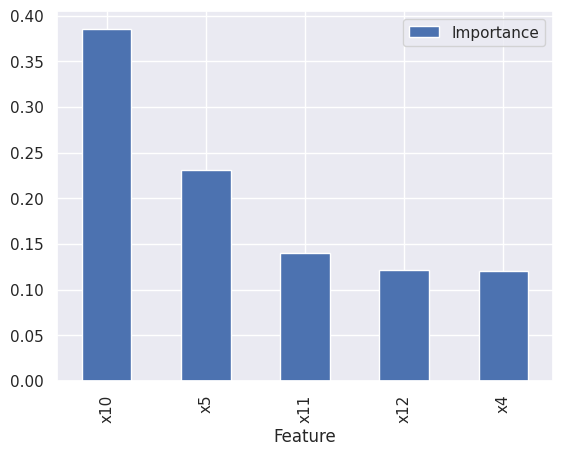

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.pipeline import Pipeline
sns.set_theme(style='darkgrid')

data_cleaning_feat_eng_steps = 8

transformation_steps = best_regressor_pipeline.steps[:-1]
temp_pipeline = Pipeline(transformation_steps)

transformed_X = temp_pipeline.fit_transform(X_train, y_train)

feature_names = X_train.columns
for name, transformer in temp_pipeline.named_steps.items():
    if hasattr(transformer, 'get_feature_names_out'):
        feature_names = transformer.get_feature_names_out()

transformed_data = pd.DataFrame(transformed_X, columns=feature_names)

print("Transformed data shape:", transformed_data.shape)
print("Number of columns in transformed data:", len(transformed_data.columns))
print("Feature names:", list(transformed_data.columns))

if 'feat_selection' in best_regressor_pipeline.named_steps:
    feat_selector = best_regressor_pipeline['feat_selection']
    
    support_mask = feat_selector.get_support()
    print("Length of support mask:", len(support_mask))
    print("Support mask:", support_mask)
    
    if len(support_mask) == len(transformed_data.columns):
        selected_columns = transformed_data.columns[support_mask]
        print("Selected columns:", selected_columns)
    else:
        print("Warning: Support mask length doesn't match number of columns. Using all columns.")
        selected_columns = transformed_data.columns
else:
    selected_columns = transformed_data.columns

final_model = best_regressor_pipeline.named_steps['model']

try:
    final_model.fit(transformed_data, y_train)
except ValueError as e:
    print("Error details:", str(e))
    print("y_train type:", type(y_train))
    print("y_train values:", y_train.values if hasattr(y_train, 'values') else y_train)

if hasattr(final_model, 'feature_importances_'):
    feature_importances = final_model.feature_importances_
else:
    print("Model does not have feature importances attribute. Skipping this step.")
    feature_importances = None

if feature_importances is not None:
    df_feature_importance = pd.DataFrame({
        'Feature': selected_columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    print(f"* These are the {len(df_feature_importance)} most important features in descending order: \n{df_feature_importance['Feature'].to_list()}")

    df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
    plt.show()
else:
    print("No feature importance to plot.")

In [41]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
import numpy as np

def regression_performance(X_train, y_train, X_test, y_test,pipeline):
	print("Model Evaluation \n")
	print("* Train Set")
	regression_evaluation(X_train,y_train,pipeline)
	print("* Test Set")
	regression_evaluation(X_test,y_test,pipeline)

def regression_evaluation(X, y, pipeline):
  prediction = pipeline.predict(X)
  print('R2 Score:', round(r2_score(y, prediction), 3))
  print('Mean Absolute Error:', round(mean_absolute_error(y, prediction), 3))
  print('Mean Squared Error:', round(mean_squared_error(y, prediction), 3))
  print('Root Mean Squared Error:', round(np.sqrt(mean_squared_error(y, prediction)), 3))
  print("\n")


def regression_evaluation_plots(X_train, y_train, X_test, y_test,pipeline, alpha_scatter=0.5):
  pred_train = pipeline.predict(X_train)
  pred_test = pipeline.predict(X_test)


  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
  sns.scatterplot(x=y_train, y=pred_train, alpha=alpha_scatter, ax=axes[0])
  sns.lineplot(x=y_train , y=y_train, color='orange', ax=axes[0])
  axes[0].set_xlabel("Actual")
  axes[0].set_ylabel("Predictions")
  axes[0].set_title("Train Set")

  sns.scatterplot(x=y_test, y=pred_test, alpha=alpha_scatter, ax=axes[1])
  sns.lineplot(x=y_test, y=y_test, color='orange', ax=axes[1])
  axes[1].set_xlabel("Actual")
  axes[1].set_ylabel("Predictions")
  axes[1].set_title("Test Set")
  plt.savefig(f'docs/plots/regression_performance.png', bbox_inches='tight')  
  plt.show()

Model Evaluation 

* Train Set
R2 Score: 1.0
Mean Absolute Error: 104.456
Mean Squared Error: 748877.922
Root Mean Squared Error: 865.377


* Test Set
R2 Score: 0.883
Mean Absolute Error: 19702.181
Mean Squared Error: 895466034.303
Root Mean Squared Error: 29924.338




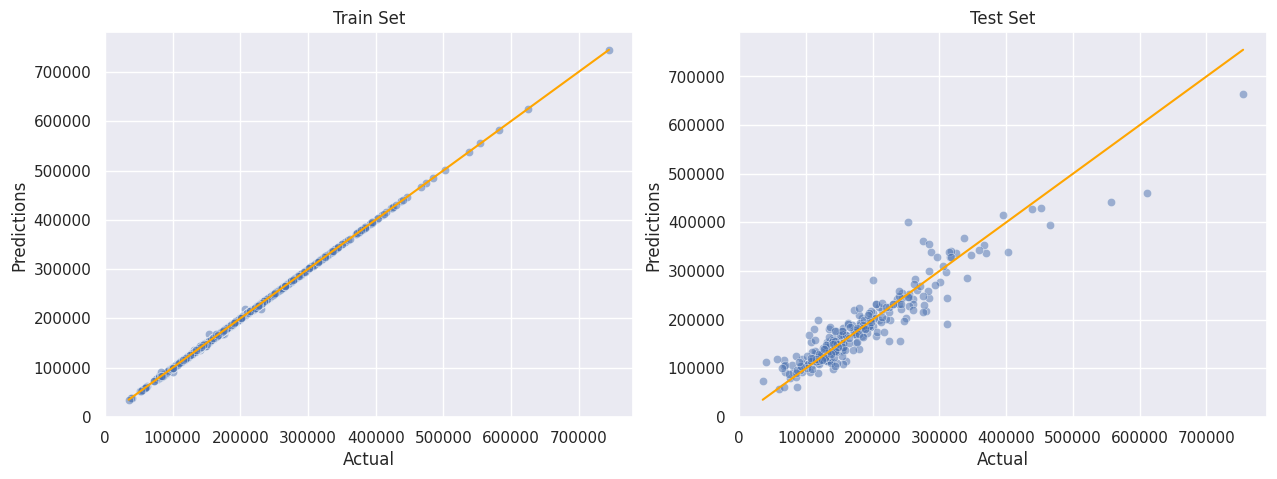

In [42]:
regression_performance(X_train, y_train, X_test, y_test,best_regressor_pipeline)
regression_evaluation_plots(X_train, y_train, X_test, y_test, best_regressor_pipeline)

Best regressor model pipeline.

In [43]:
best_regressor_pipeline

Pipeline(steps=[('lt', LogTransformer(variables=['LotArea', 'GrLivArea'])),
                ('pt',
                 PowerTransformer(variables=['GarageArea', 'MasVnrArea',
                                             'OpenPorchSF', 'TotalBsmtSF',
                                             '1stFlrSF', '2ndFlrSF'])),
                ('Winsoriser_iqr',
                 Winsorizer(capping_method='iqr', fold=1.6, tail='both',
                            variables=['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1',
                                       'BsmtUnfSF', 'GarageArea', 'GrLivArea',
                                       'LotArea', 'MasVnrArea', 'OpenPorchSF',
                                       'TotalBsmtSF'])),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance')),
                ('feat_scaling', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=ExtraTreesRegressor(random_state=72))),
                ('model', ExtraTreesRegressor(random_state=72))])

In [44]:
def PipelineOptimization(model):
    pipeline_base = Pipeline(steps=[  
    ( 'mean',  MeanMedianImputer(imputation_method='mean',
                                     variables=['GarageArea']) ),
                                     
    ('lt', vt.LogTransformer(variables = ['GrLivArea']) ),

    ('pt', vt.PowerTransformer(variables = ['TotalBsmtSF']) ),
      
    ("Winsoriser_iqr",Winsorizer(capping_method='iqr', fold=1.5, tail='both', 
                                                  variables=['GarageArea', 'TotalBsmtSF']) ),      

    ("feat_scaling", StandardScaler() ),

  ('model', ExtraTreesRegressor(max_depth=20, min_samples_split=50,
                                     n_estimators=150, random_state=76))])        
    return pipeline_base

In [45]:
print("Original columns in the dataset:", df.columns)

Original columns in the dataset: Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtUnfSF',
       'GarageArea', 'GarageYrBlt', 'GrLivArea', 'LotArea', 'MasVnrArea',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'TotalBsmtSF', 'YearBuilt',
       'YearRemodAdd', 'SalePrice'],
      dtype='object')


In [46]:
best_features = ['1stFlrSF', 'BsmtFinSF1', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'LotArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']

missing_train_columns = [col for col in best_features if col not in X_train.columns]
missing_test_columns = [col for col in best_features if col not in X_test.columns]

if missing_train_columns:
    print(f"X-train is missing columns: {missing_train_columns}")

if missing_test_columns:
    print(f"X-test is missing columns: {missing_test_columns}")

if not missing_train_columns and not missing_test_columns:
    X_train = X_train[best_features]
    X_test = X_test[best_features]

    print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:", X_test.shape, y_test.shape)
    print(X_train.head(5))
else:
    print("There are columns missing")

* Train set: (1168, 10) (1168,) 
* Test set: (292, 10) (292,)
      1stFlrSF  BsmtFinSF1  GarageArea  GarageYrBlt  GrLivArea  LotArea  \
254       1314         922         294       1957.0       1314     8400   
1066       799           0         380       1993.0       1571     7837   
638        796           0           0       1979.0        796     8777   
799        981         569         240       1939.0       1768     7200   
380       1026         218         308       1924.0       1691     5000   

      OverallQual  TotalBsmtSF  YearBuilt  YearRemodAdd  
254             5         1314       1957          1957  
1066            6          799       1993          1994  
638             5          796       1910          1950  
799             5          731       1937          1950  
380             5         1026       1924          1950  


In [47]:
models_search

{'ExtraTreesRegressor': ExtraTreesRegressor(random_state=72)}

In [48]:
best_parameters

{'model__max_depth': None,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__n_estimators': 100}

In [49]:
params_search = {
    "ExtraTreesRegressor": {
        'model__n_estimators': [50, 100, 150],
        'model__max_depth': [3, 5, 10],
        'model__min_samples_split': [5, 10, 20],
        'model__min_samples_leaf': [5, 10, 20],
    },
}

In [50]:
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train, y_train, scoring = 'r2', n_jobs=-1, cv=5)


Running GridSearchCV for ExtraTreesRegressor 

Fitting 5 folds for each of 81 candidates, totalling 405 fits


Retrieves a summary of the grid search results using the score_summary method from the search object, sorting the results by the mean score.

In [51]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score,model__max_depth,model__min_samples_leaf,model__min_samples_split,model__n_estimators
54,ExtraTreesRegressor,0.795031,0.832584,0.86968,0.030697,10,5,5,50
57,ExtraTreesRegressor,0.795031,0.832584,0.86968,0.030697,10,5,10,50
56,ExtraTreesRegressor,0.792633,0.832363,0.871848,0.031448,10,5,5,150
59,ExtraTreesRegressor,0.792633,0.832363,0.871848,0.031448,10,5,10,150
58,ExtraTreesRegressor,0.792312,0.832175,0.869787,0.030856,10,5,10,100
...,...,...,...,...,...,...,...,...,...
25,ExtraTreesRegressor,0.682502,0.740752,0.760558,0.030068,3,20,20,100
22,ExtraTreesRegressor,0.682502,0.740752,0.760558,0.030068,3,20,10,100
18,ExtraTreesRegressor,0.681927,0.740496,0.762937,0.030545,3,20,5,50
21,ExtraTreesRegressor,0.681927,0.740496,0.762937,0.030545,3,20,10,50


Selects best model from grid_search_summary DataFrame by accessing the first row and first column, which corresponds to the model with the highest mean score.

In [52]:
best_model = grid_search_summary.iloc[0,0]
best_model

'ExtraTreesRegressor'

Retrieves the best regressor pipeline from grid_search_pipelines using the best model identifier.

In [53]:
best_pipeline_regressor = grid_search_pipelines[best_model].best_estimator_
best_pipeline_regressor

Pipeline(steps=[('mean',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['GarageArea'])),
                ('lt', LogTransformer(variables=['GrLivArea'])),
                ('pt', PowerTransformer(variables=['TotalBsmtSF'])),
                ('Winsoriser_iqr',
                 Winsorizer(capping_method='iqr', fold=1.5, tail='both',
                            variables=['GarageArea', 'TotalBsmtSF'])),
                ('feat_scaling', StandardScaler()),
                ('model',
                 ExtraTreesRegressor(max_depth=10, min_samples_leaf=5,
                                     min_samples_split=5, n_estimators=50,
                                     random_state=76))])

In [55]:
import joblib
import os

version = 'v1'
file_path = f'outputs/ml_pipeline/predict_price/{version}'

try:
  os.makedirs(name=file_path)
except Exception as e:
  print(e)

Displays the first 15 rows of X_train.

In [56]:
X_train.head(15)

,1stFlrSF,BsmtFinSF1,GarageArea,GarageYrBlt,GrLivArea,LotArea,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd
254,1314,922,294,1957.0,1314,8400,5,1314,1957,1957
1066,799,0,380,1993.0,1571,7837,6,799,1993,1994
638,796,0,0,1979.0,796,8777,5,796,1910,1950
799,981,569,240,1939.0,1768,7200,5,731,1937,1950
380,1026,218,308,1924.0,1691,5000,5,1026,1924,1950
303,894,894,552,1975.0,894,9800,5,894,1972,1972
86,684,0,400,2005.0,1560,11911,6,684,2005,2005
1385,796,735,240,1922.0,1154,5436,4,796,1922,2007
265,1422,588,576,1981.0,1422,12090,6,1422,1981,1981
793,1496,0,474,2007.0,1496,9158,8,1496,2007,2007


In [57]:
X_train.to_csv(f"{file_path}/X_train.csv", index=False)
y_train.to_csv(f"{file_path}/y_train.csv", index=False)

Displays the first 15 rows of y_test.

In [58]:
y_test.head(15)

892     154500
1105    325000
413     115000
522     159000
1036    315500
614      75500
218     311500
1160    146000
649      84500
887     135500
576     145000
1252    130000
1061     81000
567     214000
1108    181000
Name: SalePrice, dtype: int64

Saves the X_test and y_test datasets as CSV files in the specified directory (file_path). The X_test data is saved as X_test.csv and the y_test data as y_test.csv, both without including row indices.

In [59]:
X_test.to_csv(f"{file_path}/X_test.csv", index=False) 
y_test.to_csv(f"{file_path}/y_test.csv", index=False)

Show the steps within the pipeline.

In [60]:
best_pipeline_regressor

Pipeline(steps=[('mean',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['GarageArea'])),
                ('lt', LogTransformer(variables=['GrLivArea'])),
                ('pt', PowerTransformer(variables=['TotalBsmtSF'])),
                ('Winsoriser_iqr',
                 Winsorizer(capping_method='iqr', fold=1.5, tail='both',
                            variables=['GarageArea', 'TotalBsmtSF'])),
                ('feat_scaling', StandardScaler()),
                ('model',
                 ExtraTreesRegressor(max_depth=10, min_samples_leaf=5,
                                     min_samples_split=5, n_estimators=50,
                                     random_state=76))])

Prints the machine learning pipeline preprocessing and modeling steps.

In [61]:
print(best_pipeline_regressor)

Pipeline(steps=[('mean',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['GarageArea'])),
                ('lt', LogTransformer(variables=['GrLivArea'])),
                ('pt', PowerTransformer(variables=['TotalBsmtSF'])),
                ('Winsoriser_iqr',
                 Winsorizer(capping_method='iqr', fold=1.5, tail='both',
                            variables=['GarageArea', 'TotalBsmtSF'])),
                ('feat_scaling', StandardScaler()),
                ('model',
                 ExtraTreesRegressor(max_depth=10, min_samples_leaf=5,
                                     min_samples_split=5, n_estimators=50,
                                     random_state=76))])


Saves best_pipeline_regressor to a file using joblib. It serializes the pipeline object and stores it as regression_pipeline.pkl in a directory defined by file_path.

In [62]:
import joblib
joblib.dump(value=best_pipeline_regressor, filename=f"{file_path}/regression_pipeline.pkl")

['outputs/ml_pipeline/predict_price/v1/regression_pipeline.pkl']

Creates a bar plot to visualize the feature importance of a machine learning model using the data stored in df_feature_importance.

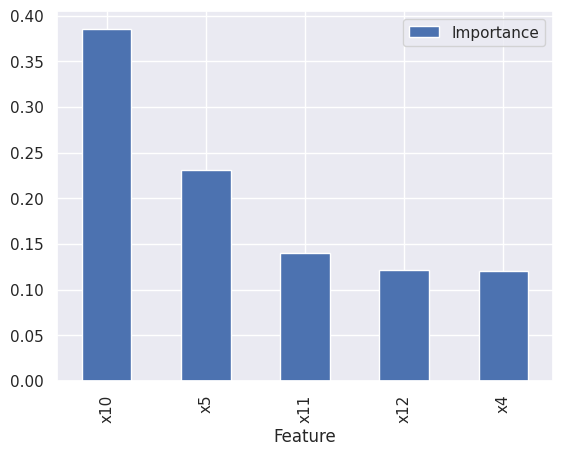

In [63]:
df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
plt.show()

Creates a bar plot for feature importance and saves it as images in two specified locations.

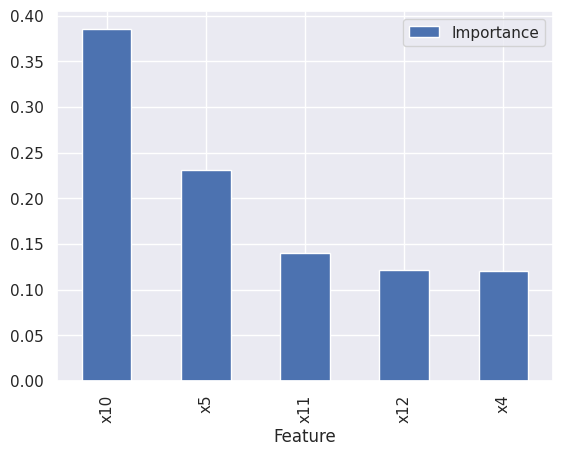

In [64]:
df_feature_importance.plot(kind='bar',x='Feature',y='Importance')
plt.savefig(f'{file_path}/features_importance.png', bbox_inches='tight')
plt.savefig(f'docs/plots/features_importance.png', bbox_inches='tight') 

Prints the machine learning pipeline preprocessing and modeling steps.

In [65]:
print(best_pipeline_regressor)

Pipeline(steps=[('mean',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['GarageArea'])),
                ('lt', LogTransformer(variables=['GrLivArea'])),
                ('pt', PowerTransformer(variables=['TotalBsmtSF'])),
                ('Winsoriser_iqr',
                 Winsorizer(capping_method='iqr', fold=1.5, tail='both',
                            variables=['GarageArea', 'TotalBsmtSF'])),
                ('feat_scaling', StandardScaler()),
                ('model',
                 ExtraTreesRegressor(max_depth=10, min_samples_leaf=5,
                                     min_samples_split=5, n_estimators=50,
                                     random_state=76))])


## Conclusions and Next Steps

### Next Steps
The Next Step is to create a Streamlit app.